#### Graphical EDA

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
df = pd.read_csv('Iris.csv')

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [20]:
setosa_petal_length = df[df['Species'] == 'Iris-setosa']['PetalLengthCm']
versicolor_petal_length = df[df['Species'] == 'Iris-versicolor']['PetalLengthCm']

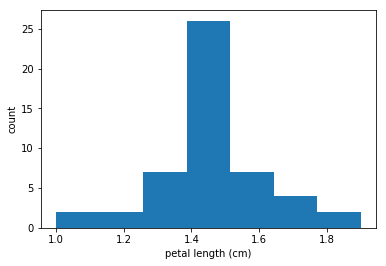

In [8]:
#Histogram

n_data = len(setosa_petal_length)

# Number of bins is the square root of number of data points: n_bins
bins = np.sqrt(n_data)

# Convert number of bins to integer: n_bins
n_bins = int(bins)

# Plot the histogram
_ = plt.hist(setosa_petal_length , bins = n_bins)

# Label axes
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('count')

# Show histogram
plt.show()

In [14]:
# bin_edges = [1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9]
# plt.hist(setosa_petal_length , bins = bin_edges , histtype='step')

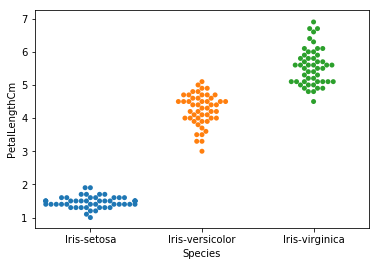

In [15]:
#Bee Swarmn plot
sns.swarmplot(x = 'Species' , y = 'PetalLengthCm' , data = df)

In [16]:
#In bee swarm plots edges will have overlapping data points . So ECDF is used

##### Empirical cumulative distribution function (ECDF)

In [17]:
def ecdf(data):
    """ECDF for a one-dimensional array."""
    # Number of data points: n
    n = len(data)

    x = np.sort(data)

    y = np.arange(1, n+1) / n
    
    return x, y

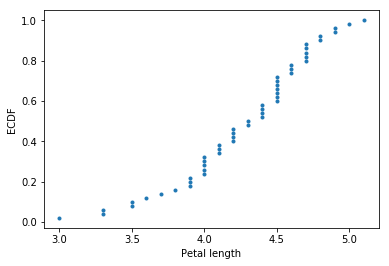

In [21]:
x_vers, y_vers = ecdf(versicolor_petal_length)

# Generate plot
plt.plot(x_vers , y_vers , marker='.', linestyle= 'none')

# Label the axes
plt.xlabel('Petal length')
plt.ylabel('ECDF')

# Display the plot
plt.show()

In [22]:
#Nearly 30% of petals are less than 4.0 cm
#Nearly 60% of petals are less than 4.5 cm

##### Qunantitative EDA

In [24]:
#mean
#median

In [25]:
#percentile and outliers
np.percentile(df['PetalLengthCm'] , [2.5 , 25 , 50 , 75 , 95])

array([1.2725, 1.6   , 4.35  , 5.1   , 6.1   ])

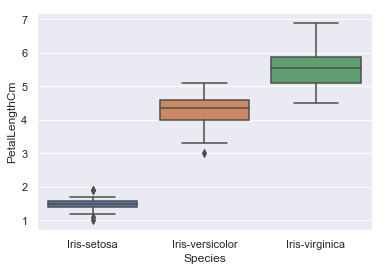

In [28]:
#Boxpot
sns.boxplot(x = 'Species' , y = 'PetalLengthCm' , data = df)

In [29]:
#Varience
#Standard Deviation
#Covarience

#### Probablity - Discrete Variable

In [30]:
#Statistical Inference - Process by which we go from measured data to probabilistic conclusion about what we might 
#                        expect if we collect the data again

In [31]:
#Hacker statistics

#Bernoulli_trial

def perform_bernoulli_trials(n, p):
    """Perform n Bernoulli trials with success probability p
    and return number of successes."""
    n_success = 0

    # Perform trials
    for i in range(n):
        random_number = np.random.random()
        
        if random_number < p:
            n_success += 1

    return n_success

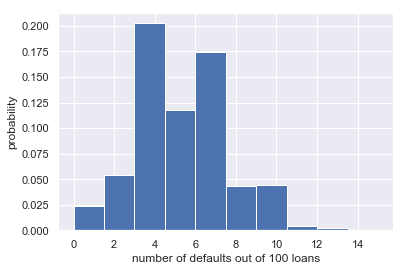

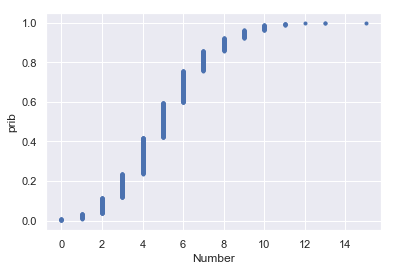

Probability of losing money = 0.038


In [34]:
#A bank made 100 mortgage loans.
#It is possible that anywhere between 0 and 100 of the loans will be defaulted upon.
#If chance of getting a default is 5 %

n_defaults = np.empty(1000)
for i in range(1000):
    n_defaults[i] = perform_bernoulli_trials(100 , 0.05)


# Plot the histogram with default number of bins; label your axes
_ = plt.hist(n_defaults, normed = True)
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('probability')

# Plot
plt.show()

x , y = ecdf(n_defaults)

# Plot the ECDF with labeled axes
plt.plot(x , y , marker = '.' , linestyle = 'none')
plt.xlabel('Number')
plt.ylabel('prib')


# Show the plot
plt.show()

# Number of 100-loan simulations with 10 or more defaults: n_lose_money

n_lose_money = np.sum(x >= 10)

# Compute and print probability of losing money
print('Probability of losing money =', n_lose_money / len(n_defaults))


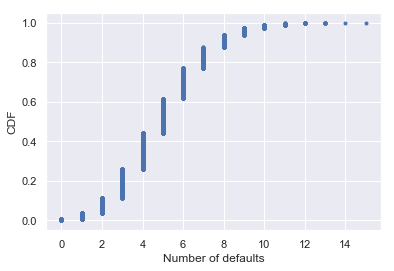

In [35]:
#Plotting CDF for a binomial distribution

# 10,000 samples out of the binomial distribution: n_defaults
n_defaults = np.random.binomial(n = 100 , p = 0.05 , size = 10000)

x , y = ecdf(n_defaults)

# Plot the CDF with axis labels
plt.plot(x,y,marker = '.' , linestyle = 'none')
plt.xlabel('Number of defaults')
plt.ylabel('CDF')

# Show the plot
plt.show()

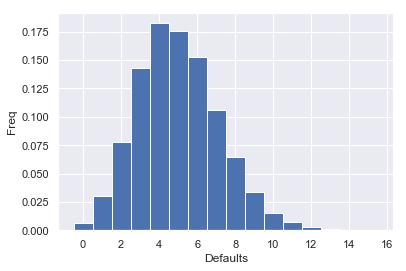

In [36]:
#Plotting PMF for a binomial distribution

# Compute bin edges: bins
bins = np.arange(min(n_defaults), max(n_defaults) + 1.5) - 0.5

# Generate histogram
plt.hist(n_defaults , normed = True , bins = bins)

# Label axes
plt.xlabel('Defaults')
plt.ylabel('Freq')

# Show the plot
plt.show()

##### Poisson Distribution

In [39]:
# Average rate per interval
# Limit of Binomial dist , Low probablitiy of success (ie rare events)

#Relation between poisson and binomial distribution

# Drawing 10,000 samples out of Poisson distribution: samples_poisson
samples_poisson = np.random.poisson(10,10000)

# Mean and standard deviation of poisson distribution
print('Poisson:     ', np.mean(samples_poisson),
                       np.std(samples_poisson))

# Values of n and p to consider for Binomial: n, p
n = [20 , 100 , 1000]
p = [0.5 , 0.1 , 0.01]

# Draw 10,000 samples for each n,p pair: samples_binomial
for i in range(3):
    samples_binomial = np.random.binomial(n[i] , p[i] , 10000)

    # Print results
    print('n =', n[i], 'Binom:', np.mean(samples_binomial),
                                 np.std(samples_binomial))


Poisson:      10.0157 3.193908813663909
n = 20 Binom: 10.0091 2.229398391943441
n = 100 Binom: 10.0091 3.001602437032593
n = 1000 Binom: 9.9972 3.1492843885555972


#### Probablity Continuous variables

###### Normal Distribution

In [42]:
#PDF - Probablity distribution function
#CDF - Cumulative distribution function 

C:\Users\epras\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


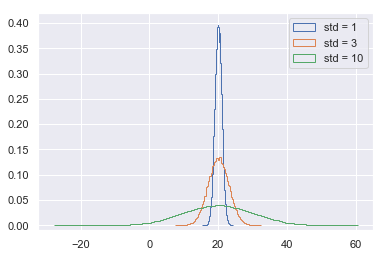

In [43]:
# Normal Distribution

samples_std1 = np.random.normal(20 , 1, 100000) 
samples_std3 = np.random.normal(20 , 3, 100000) 
samples_std10= np.random.normal(20 ,10, 100000) 

# Make histograms
plt.hist(samples_std1 ,bins = 100, normed = True , histtype = 'step')
plt.hist(samples_std3 ,bins = 100, normed = True , histtype = 'step')
plt.hist(samples_std10 ,bins = 100, normed = True , histtype = 'step')

# Make a legend, set limits and show plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'))
plt.ylim(-0.01, 0.42)
plt.show()


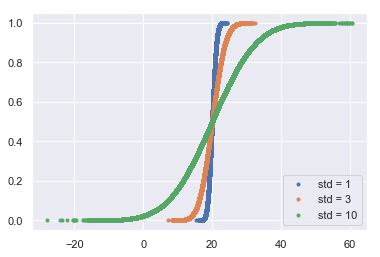

In [46]:
# CDFs
x_std1, y_std1   = ecdf(samples_std1)
x_std3, y_std3   = ecdf(samples_std3)
x_std10, y_std10 = ecdf(samples_std10)

# Plotting CDFs
plt.plot(x_std1, y_std1 , marker = '.' , linestyle = 'none')
plt.plot(x_std3, y_std3 , marker = '.' , linestyle = 'none')
plt.plot(x_std10, y_std10 , marker = '.' , linestyle = 'none')

plt.legend(('std = 1', 'std = 3', 'std = 10'), loc='lower right')
plt.show()


##### Exponential Distribution

In [47]:
#Waiting time between arrival of poisson process is exponentially distributed

In [ ]:
#Hitting the cycle is another rare baseball event. 
#When a batter hits the cycle, he gets all four kinds of hits, a single, double, triple, and home run, in a single game. 
#The mean waiting time for a no-hitter is 764 games, and the mean waiting time for hitting the cycle is 715 games.

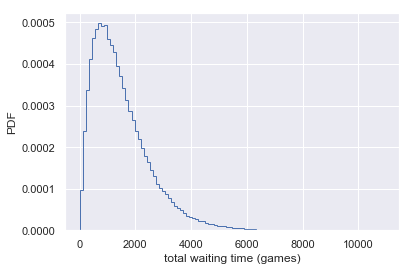

In [50]:
def successive_poisson(tau1, tau2, size=1):
    """Compute time for arrival of 2 successive Poisson processes."""
    # To draw samples out of first exponential distribution: t1
    t1 = np.random.exponential(tau1, size=size)

    # To draw samples out of second exponential distribution: t2
    t2 = np.random.exponential(tau2, size=size)

    return t1 + t2

# Draw samples of waiting times
waiting_times = successive_poisson(764, 715, size=100000)

# Make the histogram
_ = plt.hist(waiting_times, bins=100, histtype='step',
             normed=True)

# Label axes
_ = plt.xlabel('total waiting time (games)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

### Parameter estimation by optimization


###### Optimal Parameter

Parameter value that bring the model in close agreement with data

**How often do we get no-hitters in baseball?**

The number of games played between each no-hitter in the modern era (1901-2015) of Major League Baseball is stored in the array nohitter_times.

If you assume that no-hitters are described as a Poisson process, then the time between no-hitters is Exponentially distributed. The Exponential distribution has a single parameter, which we will call τ, the typical interval time. The value of the parameter τ that makes the exponential distribution best match the data is the mean interval time (where time is in units of number of games) between no-hitters.

Compute the value of this parameter from the data. Then, use np.random.exponential() to "repeat" the history of Major League Baseball by drawing inter-no-hitter times from an exponential distribution with the τ you found and plot the histogram as an approximation to the PDF.

In [53]:
nohitter_times = np.array([ 843, 1613, 1101,  215,  684,  814,  278,  324,  161,  219,  545,
        715,  966,  624,   29,  450,  107,   20,   91, 1325,  124, 1468,
        104, 1309,  429,   62, 1878, 1104,  123,  251,   93,  188,  983,
        166,   96,  702,   23,  524,   26,  299,   59,   39,   12,    2,
        308, 1114,  813,  887,  645, 2088,   42, 2090,   11,  886, 1665,
       1084, 2900, 2432,  750, 4021, 1070, 1765, 1322,   26,  548, 1525,
         77, 2181, 2752,  127, 2147,  211,   41, 1575,  151,  479,  697,
        557, 2267,  542,  392,   73,  603,  233,  255,  528,  397, 1529,
       1023, 1194,  462,  583,   37,  943,  996,  480, 1497,  717,  224,
        219, 1531,  498,   44,  288,  267,  600,   52,  269, 1086,  386,
        176, 2199,  216,   54,  675, 1243,  463,  650,  171,  327,  110,
        774,  509,    8,  197,  136,   12, 1124,   64,  380,  811,  232,
        192,  731,  715,  226,  605,  539, 1491,  323,  240,  179,  702,
        156,   82, 1397,  354,  778,  603, 1001,  385,  986,  203,  149,
        576,  445,  180, 1403,  252,  675, 1351, 2983, 1568,   45,  899,
       3260, 1025,   31,  100, 2055, 4043,   79,  238, 3931, 2351,  595,
        110,  215,    0,  563,  206,  660,  242,  577,  179,  157,  192,
        192, 1848,  792, 1693,   55,  388,  225, 1134, 1172, 1555,   31,
       1582, 1044,  378, 1687, 2915,  280,  765, 2819,  511, 1521,  745,
       2491,  580, 2072, 6450,  578,  745, 1075, 1103, 1549, 1520,  138,
       1202,  296,  277,  351,  391,  950,  459,   62, 1056, 1128,  139,
        420,   87,   71,  814,  603, 1349,  162, 1027,  783,  326,  101,
        876,  381,  905,  156,  419,  239,  119,  129,  467])

C:\Users\epras\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


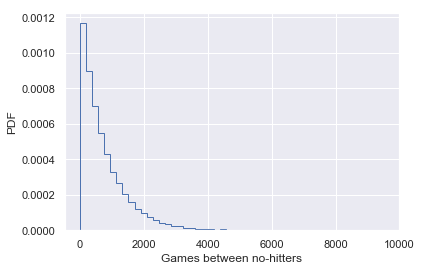

In [54]:
# Compute mean no-hitter time: tau
tau = np.mean(nohitter_times)

# Exponential distribution with parameter tau: inter_nohitter_time
inter_nohitter_time = np.random.exponential(tau, 100000)

# Plot the PDF and label axes
_ = plt.hist(inter_nohitter_time,
             bins = 50, normed = True, histtype = 'step')
_ = plt.xlabel('Games between no-hitters')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

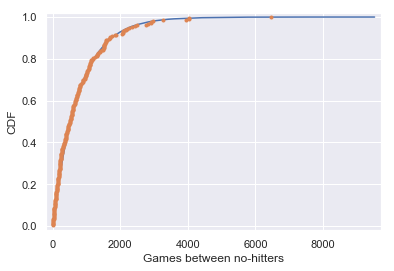

In [56]:
#Overlaying the theoretical CDF with the ECDF from the data

# Create an ECDF from real data: x, y
x, y = ecdf(nohitter_times)

# Creating a CDF from theoretical samples: x_theor, y_theor
x_theor, y_theor = ecdf(inter_nohitter_time)

# Overlaying the plots
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none')

# Margins and axis labels
plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

# Show the plot
plt.show()

**Optimal Parameters**

Sample out of an exponential distribution with τ being twice as large as the optimal τ. Then again for τ half as large. Make CDFs of these samples and overlay them with the data. Now we see that they do not reproduce the data as well. Thus, the τ you computed from the mean inter-no-hitter times is optimal in that it best reproduces the data.

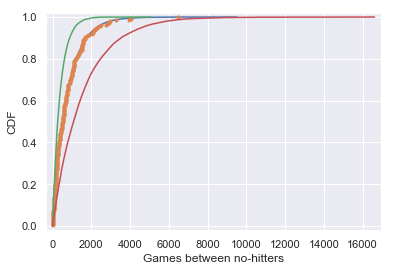

In [58]:
# Plotting theoretical CDFs
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

# Samples with half tau: samples_half
samples_half = np.random.exponential(tau/2 , 10000)

# Samples with double tau: samples_double
samples_double = np.random.exponential(2*tau , 10000)

# Generating CDFs from these samples
x_half, y_half = ecdf(samples_half)
x_double, y_double = ecdf(samples_double)

# Plotting these CDFs as lines
_ = plt.plot(x_half, y_half)
_ = plt.plot(x_double, y_double)

# Show the plot
plt.show()

##### Linear Regression by least squares

In [63]:
#Computing Pearson Correlation Coefficient

def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0,1]

In [64]:
illiteracy = np.array([ 9.5, 49.2,  1. , 11.2,  9.8, 60. , 50.2, 51.2,  0.6,  1. ,  8.5,
        6.1,  9.8,  1. , 42.2, 77.2, 18.7, 22.8,  8.5, 43.9,  1. ,  1. ,
        1.5, 10.8, 11.9,  3.4,  0.4,  3.1,  6.6, 33.7, 40.4,  2.3, 17.2,
        0.7, 36.1,  1. , 33.2, 55.9, 30.8, 87.4, 15.4, 54.6,  5.1,  1.1,
       10.2, 19.8,  0. , 40.7, 57.2, 59.9,  3.1, 55.7, 22.8, 10.9, 34.7,
       32.2, 43. ,  1.3,  1. ,  0.5, 78.4, 34.2, 84.9, 29.1, 31.3, 18.3,
       81.8, 39. , 11.2, 67. ,  4.1,  0.2, 78.1,  1. ,  7.1,  1. , 29. ,
        1.1, 11.7, 73.6, 33.9, 14. ,  0.3,  1. ,  0.8, 71.9, 40.1,  1. ,
        2.1,  3.8, 16.5,  4.1,  0.5, 44.4, 46.3, 18.7,  6.5, 36.8, 18.6,
       11.1, 22.1, 71.1,  1. ,  0. ,  0.9,  0.7, 45.5,  8.4,  0. ,  3.8,
        8.5,  2. ,  1. , 58.9,  0.3,  1. , 14. , 47. ,  4.1,  2.2,  7.2,
        0.3,  1.5, 50.5,  1.3,  0.6, 19.1,  6.9,  9.2,  2.2,  0.2, 12.3,
        4.9,  4.6,  0.3, 16.5, 65.7, 63.5, 16.8,  0.2,  1.8,  9.6, 15.2,
       14.4,  3.3, 10.6, 61.3, 10.9, 32.2,  9.3, 11.6, 20.7,  6.5,  6.7,
        3.5,  1. ,  1.6, 20.5,  1.5, 16.7,  2. ,  0.9])

In [65]:
fertility = np.array([1.769, 2.682, 2.077, 2.132, 1.827, 3.872, 2.288, 5.173, 1.393,
       1.262, 2.156, 3.026, 2.033, 1.324, 2.816, 5.211, 2.1  , 1.781,
       1.822, 5.908, 1.881, 1.852, 1.39 , 2.281, 2.505, 1.224, 1.361,
       1.468, 2.404, 5.52 , 4.058, 2.223, 4.859, 1.267, 2.342, 1.579,
       6.254, 2.334, 3.961, 6.505, 2.53 , 2.823, 2.498, 2.248, 2.508,
       3.04 , 1.854, 4.22 , 5.1  , 4.967, 1.325, 4.514, 3.173, 2.308,
       4.62 , 4.541, 5.637, 1.926, 1.747, 2.294, 5.841, 5.455, 7.069,
       2.859, 4.018, 2.513, 5.405, 5.737, 3.363, 4.89 , 1.385, 1.505,
       6.081, 1.784, 1.378, 1.45 , 1.841, 1.37 , 2.612, 5.329, 5.33 ,
       3.371, 1.281, 1.871, 2.153, 5.378, 4.45 , 1.46 , 1.436, 1.612,
       3.19 , 2.752, 3.35 , 4.01 , 4.166, 2.642, 2.977, 3.415, 2.295,
       3.019, 2.683, 5.165, 1.849, 1.836, 2.518, 2.43 , 4.528, 1.263,
       1.885, 1.943, 1.899, 1.442, 1.953, 4.697, 1.582, 2.025, 1.841,
       5.011, 1.212, 1.502, 2.516, 1.367, 2.089, 4.388, 1.854, 1.748,
       2.978, 2.152, 2.362, 1.988, 1.426, 3.29 , 3.264, 1.436, 1.393,
       2.822, 4.969, 5.659, 3.24 , 1.693, 1.647, 2.36 , 1.792, 3.45 ,
       1.516, 2.233, 2.563, 5.283, 3.885, 0.966, 2.373, 2.663, 1.251,
       2.052, 3.371, 2.093, 2.   , 3.883, 3.852, 3.718, 1.732, 3.928])

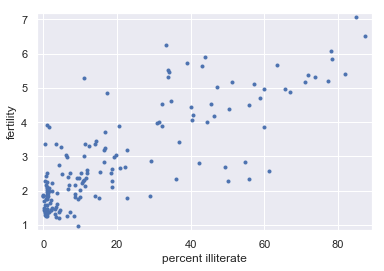

Pearson_Correlation : 0.804


In [72]:
# Plotting the illiteracy rate versus fertility - Scatter plot
_ = plt.plot(illiteracy,fertility, marker='.', linestyle='none')

# Setting the margins and label axes
plt.margins(0.02)
_ = plt.xlabel('percent illiterate')
_ = plt.ylabel('fertility')

# Showing the plot
plt.show()

# The Pearson correlation coefficient
print('Pearson_Correlation :', np.round(pearson_r( illiteracy , fertility),3))


slope = 0.04979854809063426 children per woman / percent illiterate
intercept = 1.8880506106365562 children per woman


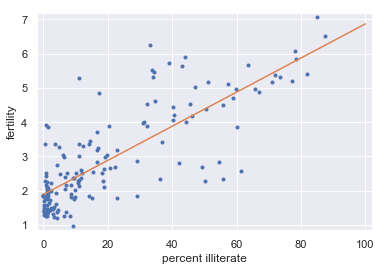

In [73]:
# Plotting the illiteracy rate versus fertility
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('percent illiterate')
_ = plt.ylabel('fertility')

# Performing a linear regression using np.polyfit(): a, b
a, b = np.polyfit(illiteracy , fertility , 1)

# Printing the results to the screen
print('slope =', a, 'children per woman / percent illiterate')
print('intercept =', b, 'children per woman')

# Making theoretical line to plot
aaa = range(0,101)
x = np.array([0,100])
y = a * x + b

# Adding regression line to your plot
_ = plt.plot(x, y)

plt.show()


Choosing Optimal Value :

The function np.polyfit() which is used to get regression parameters finds the optimal slope and intercept. It is optimizing the sum of the squares of the residuals, also known as RSS (for residual sum of squares). Plotting the function that is being optimized, the RSS, versus the slope parameter a.

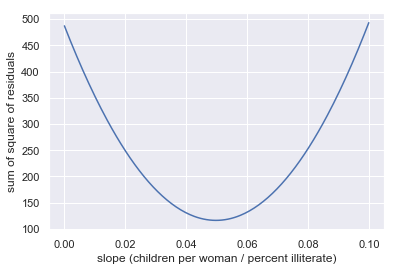

In [75]:
# Specifying slopes to consider: a_vals
a_vals = np.linspace(0,0.1,200)

# Initializing sum of square of residuals: rss
rss = np.empty_like(a_vals)

# Computing sum of square of residuals for each value of a_vals
for i, a in enumerate(a_vals):
    rss[i] = np.sum((fertility - a * illiteracy - b)**2)

# Plotting the Residual Sum of Squares
plt.plot(a_vals,rss, '-')
plt.xlabel('slope (children per woman / percent illiterate)')
plt.ylabel('sum of square of residuals')

plt.show()